In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
weights_df = pd.read_csv("weights.tsv", header=None)
weights_series = weights_df[0]

In [5]:
#1.1
type(weights_series)

pandas.core.series.Series

In [6]:
#1.2
weight_kilos = round(weights_series * 0.453592, 2)
weight_kilos

0     74.39
1     71.67
2     78.02
3     69.40
4     65.32
5     70.76
6     85.73
7     73.94
8     60.78
9     72.12
10    64.86
11    79.83
12    80.29
13    73.48
14    63.96
15    68.49
16    82.55
17    83.91
18    77.56
19    68.95
Name: 0, dtype: float64

In [7]:
#1.3
print("Weight in pounds mean: ", weights_series.mean())
print("weight in pounds median: ", weights_series.median())
print("weight in pounds standard deviation: ", weights_series.std())

print("Weight in kilos mean: ", weight_kilos.mean())
print("weight in kilos median: ", weight_kilos.median())
print("weight in kilos standard deviation: ", weight_kilos.std())

Weight in pounds mean:  161.6
weight in pounds median:  160.5
weight in pounds standard deviation:  15.44906742203316
Weight in kilos mean:  73.3005
weight in kilos median:  72.80000000000001
weight in kilos standard deviation:  7.007011882843914


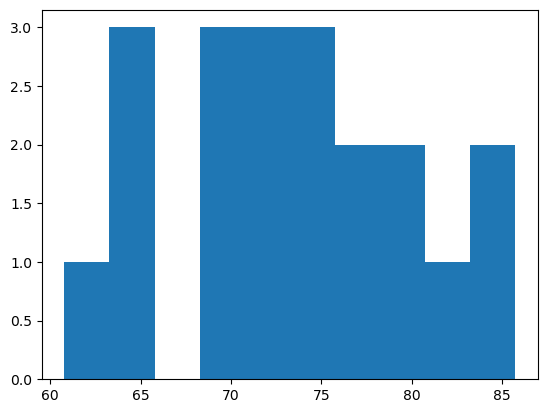

In [8]:
#1.4
plt.hist(weight_kilos, bins=10)
plt.show()

In [9]:
#2.1
boston_df = pd.read_csv("boston.csv")
num_rows, num_cols = boston_df.shape

In [10]:
print("Number of Rows: ", num_rows)
print("Number of Cols: ", num_cols)

Number of Rows:  506
Number of Cols:  13


In [11]:
#2.2
nox_sorted_df = boston_df.sort_values(by="NOX")
print("MEDV of lowest NOX from Boston data: ", nox_sorted_df["MEDV"].head(1).values[0])

MEDV of lowest NOX from Boston data:  20.1


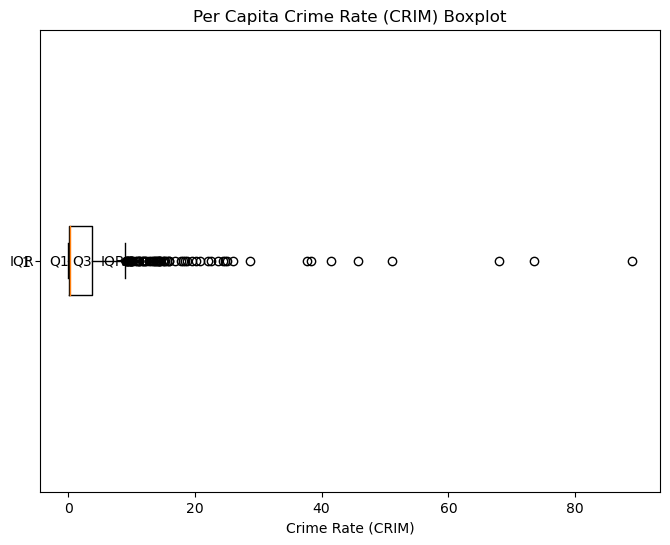

Interquartile Range (IQR) for Crime Rate (CRIM): 3.5950375


In [12]:
#2.3
Q1 = boston_df['CRIM'].quantile(0.25)
Q3 = boston_df['CRIM'].quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['CRIM'], vert=False)
plt.title('Per Capita Crime Rate (CRIM) Boxplot')
plt.xlabel('Crime Rate (CRIM)')
plt.ylabel('')

plt.text(Q1, 1, 'Q1', va='center', ha='right')
plt.text(Q3, 1, 'Q3', va='center', ha='right')
plt.text(Q1 - 1.5 * IQR, 1, 'IQR', va='center', ha='right')
plt.text(Q3 + 1.5 * IQR, 1, 'IQR', va='center', ha='right')

plt.show()

print("Interquartile Range (IQR) for Crime Rate (CRIM):", IQR)

In [13]:
#2.4
def identify_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

crime_rate_mask = identify_outliers_iqr(boston_df['CRIM'])

outliers_df = boston_df[crime_rate_mask]
non_outliers_df = boston_df[~crime_rate_mask]


In [14]:
print("Mean age of the outliers: ", outliers_df["AGE"].mean())
print("Mean age of the non outliers: ", non_outliers_df["AGE"].mean())

Mean age of the outliers:  94.23333333333335
Mean age of the non outliers:  64.72613636363636


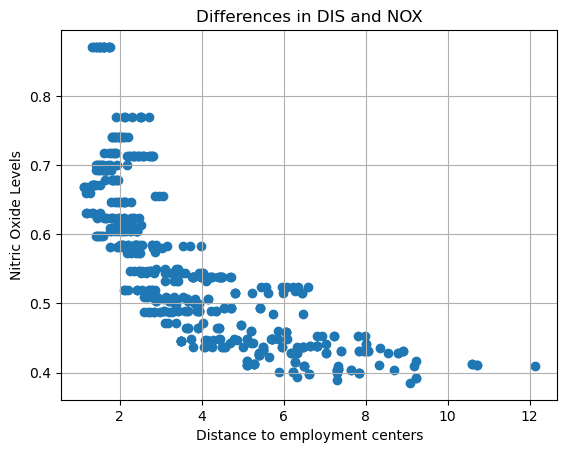

In [15]:
#2.5
plt.scatter(boston_df["DIS"], boston_df["NOX"])

plt.xlabel("Distance to employment centers")
plt.ylabel("Nitric Oxide Levels")
plt.title("Differences in DIS and NOX")
plt.grid(True)

In [16]:
correlation_index = boston_df["DIS"].corr(boston_df["NOX"])
print("Correlation index between DIS and NOX:", correlation_index)
print("With a negative correlation index, we have a negative correlation")
print("ie: as DIS increases NOX decreases")

Correlation index between DIS and NOX: -0.7692301132258278
With a negative correlation index, we have a negative correlation
ie: as DIS increases NOX decreases


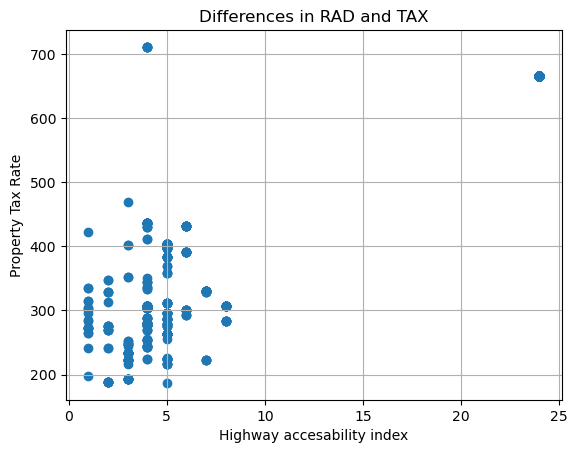

In [17]:
#2.6
plt.scatter(boston_df["RAD"], boston_df["TAX"])

plt.xlabel("Highway accesability index")
plt.ylabel("Property Tax Rate")
plt.title("Differences in RAD and TAX")
plt.grid(True)

In [18]:
correlation_index = boston_df["RAD"].corr(boston_df["TAX"])
print("Correlation index between RAD and TAX:", correlation_index)

Correlation index between RAD and TAX: 0.9102281885331835


In [48]:
boston_df = pd.read_csv('boston.csv')
l = boston_df['RAD'].values
t = boston_df['TAX'].values

In [49]:
print(t)

[296 242 242 222 222 222 311 311 311 311 311 311 311 307 307 307 307 307
 307 307 307 307 307 307 307 307 307 307 307 307 307 307 307 307 307 279
 279 279 279 252 252 233 233 233 233 233 233 233 233 233 243 243 243 243
 469 226 313 256 284 284 284 284 284 284 216 337 337 345 345 345 305 305
 305 305 398 398 398 398 398 398 281 281 281 281 247 247 247 247 270 270
 270 270 270 270 270 276 276 276 276 276 384 384 384 384 384 384 384 384
 384 384 384 432 432 432 432 432 432 432 432 432 188 188 188 188 188 188
 188 437 437 437 437 437 437 437 437 437 437 437 437 437 437 437 403 403
 403 403 403 403 403 403 403 403 403 403 403 403 403 403 403 403 403 403
 403 403 403 403 403 403 403 403 403 403 296 296 296 296 296 296 296 193
 193 193 193 193 193 193 193 398 398 398 398 398 398 265 265 255 329 329
 329 402 402 348 348 224 224 277 277 277 277 277 277 277 277 277 277 277
 276 276 276 276 307 307 307 307 307 307 307 307 307 307 307 307 307 307
 307 307 307 307 300 300 300 300 300 300 330 330 33

In [21]:
tax_mask = identify_outliers_iqr(boston_df['TAX'])

df = boston_df[~tax_mask]

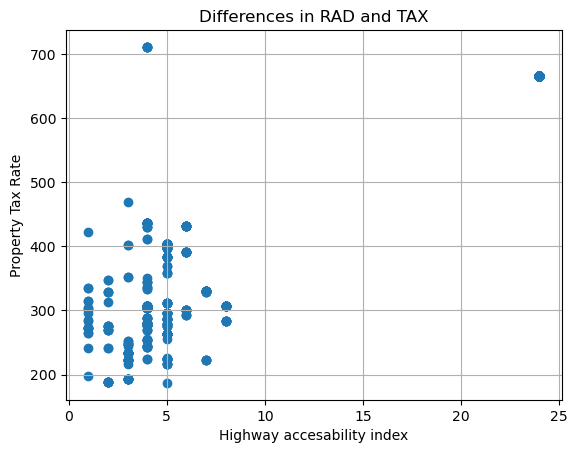

In [22]:
plt.scatter(df["RAD"], df["TAX"])

plt.xlabel("Highway accesability index")
plt.ylabel("Property Tax Rate")
plt.title("Differences in RAD and TAX")
plt.grid(True)

In [23]:
correlation_index = df["RAD"].corr(df["TAX"])
print("Correlation index between RAD and TAX:", correlation_index)

Correlation index between RAD and TAX: 0.9102281885331835


In [24]:
boston_df['RAD'].value_counts().sort_values(ascending=False)

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

In [25]:
Q1 = boston_df.quantile(0.75)
Q1

CRIM         3.677083
ZN          12.500000
NDUS        18.100000
CHAS         0.000000
NOX          0.624000
RM           6.623500
AGE         94.075000
DIS          5.188425
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
LSTAT       16.955000
MEDV        25.000000
Name: 0.75, dtype: float64

In [26]:
#3.1
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
tips_df["tip_percent"] = (tips_df["tip"] / tips_df["total_bill"]).round(2)
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15


In [28]:
#3.2
days_served = tips_df["day"].unique()
print("Days that service occured: ")
print(days_served)
mean_values_by_day = tips_df.groupby("day")["total_bill"].mean()
print("Avg total bill by day: ")
print(mean_values_by_day)

Days that service occured: 
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
Avg total bill by day: 
day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


In [29]:
#3.3
value_counts = tips_df['time'].value_counts()

time_df = pd.DataFrame({'time': value_counts.index, 'time_count': value_counts.values})

yes_smoker_counts = tips_df[tips_df['smoker'] == 'Yes'].groupby('time').size().reset_index(name='smoker_count')

print(time_df)
yes_smoker_counts

     time  time_count
0  Dinner         176
1   Lunch          68


,time,smoker_count
0,Lunch,23
1,Dinner,70


In [30]:
merged_df = pd.merge(time_df, yes_smoker_counts, on="time", how="left")
merged_df["percent_smoker_by_time"] = merged_df['smoker_count'] / merged_df['time_count']
print(merged_df)
print("Slightly more smokers at night")

     time  time_count  smoker_count  percent_smoker_by_time
0  Dinner         176            70                0.397727
1   Lunch          68            23                0.338235
Slightly more smokers at night


In [31]:
#3.4
male_df = tips_df[tips_df["sex"] == "Male"]
female_df = tips_df[tips_df["sex"] == "Female"]

Text(0.5, 1.0, 'Female Tips Boxplot')

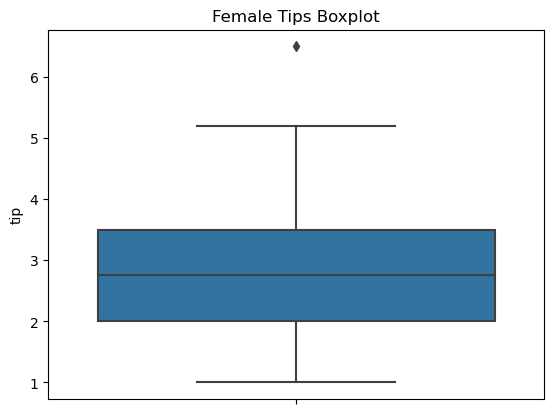

In [32]:
sns.boxplot(y="tip", data=female_df)
plt.title("Female Tips Boxplot")

Text(0.5, 1.0, 'Male Tips Boxplot')

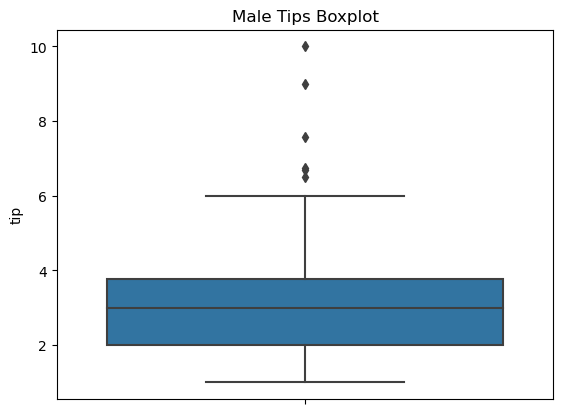

In [33]:
sns.boxplot(y="tip", data=male_df)
plt.title("Male Tips Boxplot")

In [34]:
#3.5
under_70_tip_percent_df = tips_df[tips_df["tip_percent"] < 0.7]

In [35]:
male_df_under_70 = under_70_tip_percent_df[under_70_tip_percent_df["sex"] == "Male"]
female_df_under_70 = under_70_tip_percent_df[under_70_tip_percent_df["sex"] == "Female"]

Text(0.5, 1.0, 'Female Tips Boxplot Under 70% tip percent')

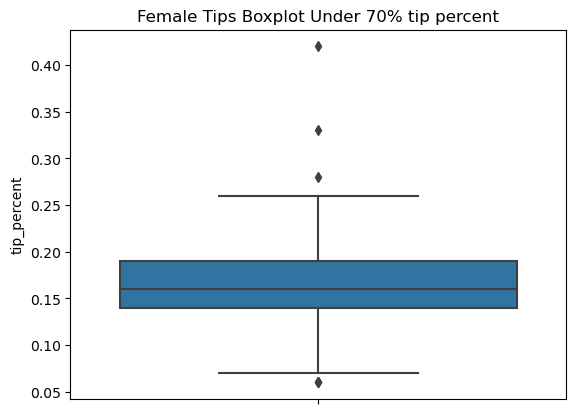

In [36]:
sns.boxplot(y="tip_percent", data=female_df_under_70)
plt.title("Female Tips Boxplot Under 70% tip percent")

Text(0.5, 1.0, 'Male Tips Boxplot Under 70% tip percent')

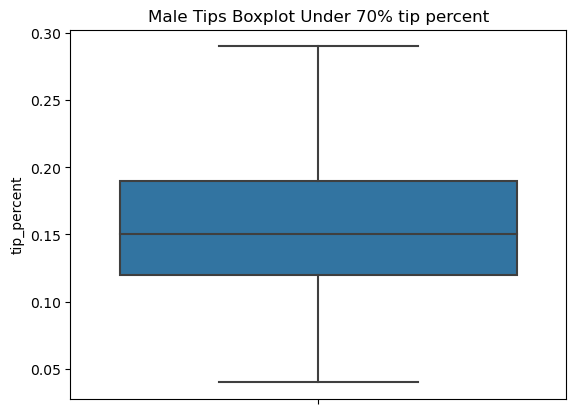

In [37]:
sns.boxplot(y="tip_percent", data=male_df_under_70)
plt.title("Male Tips Boxplot Under 70% tip percent")

In [38]:
#4.1
avo_df = pd.read_csv("avocado.csv")

In [39]:
nan_counts = avo_df.isnull().sum()

total_rows = len(avo_df)

nan_percentages = (nan_counts / total_rows) * 100

nan_info = pd.DataFrame({'NaN Count': nan_counts, 'NaN Percentage': nan_percentages})
nan_info = nan_info.sort_values(by="NaN Count", ascending=False)
nan_info

,NaN Count,NaN Percentage
Type,204,1.117869
Year,196,1.074031
Small,194,1.063072
TotalVolume,192,1.052112
AveragePrice,184,1.008274
AllSizes,184,1.008274
TotalBags,184,1.008274
Large,178,0.975396
Date,176,0.964436
Region,169,0.926078


In [40]:
avo_df

,Date,AveragePrice,TotalVolume,Small,Large,AllSizes,TotalBags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,conventional,NaN,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,NaN,8145.35,conventional,2015.0,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,organic,2018.0,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,organic,2018.0,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,organic,2018.0,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,organic,2018.0,WestTexNewMexico


In [41]:
#Dropping rows with missing qualitative values
avo_df.dropna(subset=['Date'], inplace=True)
avo_df.dropna(subset=['Region'], inplace=True)
avo_df.dropna(subset=['Type'], inplace=True)

#Already removed nan date rows, so filled the year column with the year from the date
avo_df['Year'] = avo_df['Date'].str.split('-').str[0]

columnList = ['Small', 'Large', 'AllSizes', 'TotalBags']

def sum_non_nan(row):
    non_nan_values = row[['Small', 'Large', 'AllSizes', 'TotalBags']].dropna()
    if len(non_nan_values) > 0:
        return non_nan_values.sum()
    else:
        return pd.NA

def calculate_difference(row, col):
    temp = [item for item in columnList if item != col]
    non_nan_values = row[temp].dropna()
    if len(non_nan_values) > 0:
        return row['TotalVolume'] - row[temp].sum()
    else:
        return pd.NA

# Replace NaN values in 'total_volume' column with the sum of non-NaN values in other columns
avo_df['TotalVolume'] = avo_df.apply(lambda row: sum_non_nan(row) if pd.isna(row['TotalVolume']) else row['TotalVolume'], axis=1)

# Replace Nan values in 'Small', 'Large', 'AllSizes', and 'TotalBags' with 'total_volume' - (other cols) if all other rows are non-Nan
avo_df["Small"] = avo_df.apply(lambda row: calculate_difference(row, "Small") if pd.isna(row['Small']) else row['Small'], axis=1)
avo_df["Large"] = avo_df.apply(lambda row: calculate_difference(row, "Large") if pd.isna(row['Large']) else row['Large'], axis=1)
avo_df["AllSizes"] = avo_df.apply(lambda row: calculate_difference(row, "AllSizes") if pd.isna(row['AllSizes']) else row['AllSizes'], axis=1)
avo_df["TotalBags"] = avo_df.apply(lambda row: calculate_difference(row, "TotalBags") if pd.isna(row['TotalBags']) else row['TotalBags'], axis=1)

# Interpolate the Nan 'AveragePrice' values using spline
from sklearn.impute import SimpleImputer
avo_df = avo_df.interpolate(method='spline', order=2)

In [42]:
nan_counts = avo_df.isnull().sum()

total_rows = len(avo_df)

nan_percentages = (nan_counts / total_rows) * 100

nan_info = pd.DataFrame({'NaN Count': nan_counts, 'NaN Percentage': nan_percentages})
nan_info = nan_info.sort_values(by="NaN Count", ascending=False)
nan_info

,NaN Count,NaN Percentage
Date,0,0.0
AveragePrice,0,0.0
TotalVolume,0,0.0
Small,0,0.0
Large,0,0.0
AllSizes,0,0.0
TotalBags,0,0.0
Type,0,0.0
Year,0,0.0
Region,0,0.0


In [43]:
#4.2
avo_df['Type'] = pd.Categorical(avo_df['Type'])
avo_df['Region'] = pd.Categorical(avo_df['Region'])
avo_df['Year'] = pd.Categorical(avo_df['Year'])

subset_avo_df = avo_df[~avo_df['Region'].isin(['TotalUS', 'West'])]

subset_avo_df = subset_avo_df.sort_values(by='Date')

mean_2016 = subset_avo_df.loc[subset_avo_df['Year'] == '2016', 'AveragePrice'].mean()
mean_2017 = subset_avo_df.loc[subset_avo_df['Year'] == '2017', 'AveragePrice'].mean()

In [44]:
print(mean_2016)
print(mean_2017)

1.3438916386013762
1.5176112889592213


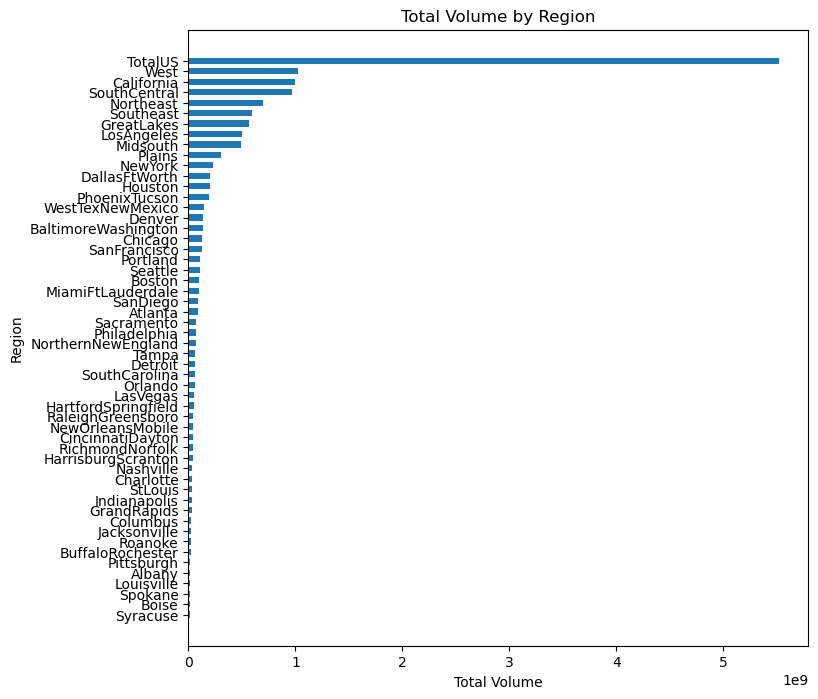

In [45]:
#4.3
sum_by_region = avo_df.groupby('Region')['TotalVolume'].sum()

sum_by_region = sum_by_region.sort_values()

plt.figure(figsize=(8, 8))

plt.barh(sum_by_region.index, sum_by_region.values, height=0.6)
plt.xlabel('Total Volume')
plt.ylabel('Region')
plt.title('Total Volume by Region')
plt.show()

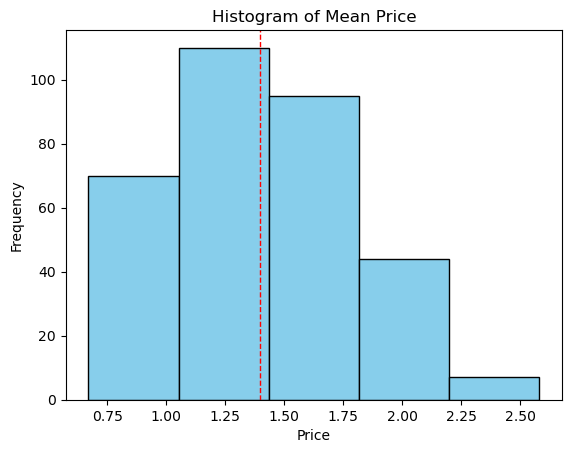

In [46]:
cali_avo_df = avo_df[avo_df['Region'] == "California"]

mean_price = cali_avo_df['AveragePrice'].mean()

plt.hist(cali_avo_df['AveragePrice'], bins=5, color='skyblue', edgecolor='black')
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Price')
plt.show()

In [47]:
correlation = cali_avo_df['TotalVolume'].corr(pd.Series([mean_price] * len(cali_avo_df)))

print("Mean Price:", mean_price)
print("Correlation coefficient between mean price and TotalVolume:", correlation)

Mean Price: 1.3960720812319667
Correlation coefficient between mean price and TotalVolume: -1.6495206150482758e-16
